In [1]:
import re
s = []

with open('./input.txt', 'r') as file:
    file_content = file.read().strip()  
individual_strings = file_content.split('\n')

for i, individual_str in enumerate(individual_strings, 1):
    word = [num for num in re.split(" ", individual_str)]
    s.append(word)

In [2]:
def dir(way,i,j):
    if way =='U':
        i-=1
        
    if way =='D':
        i+=1
    if way =='L':
        j-=1
    if way =='R':
        j+=1
    return ((i,j))

In [3]:
t = set()
t.add((0,0))
i = 0
j= 0
for k in range(len(s)):
   
    for q in range (int(s[k][1])):    
        #print(s[k][0])
        i= dir(s[k][0],i,j)[0]
        j= dir(s[k][0],i,j)[1]
        
        t.add((i,j))


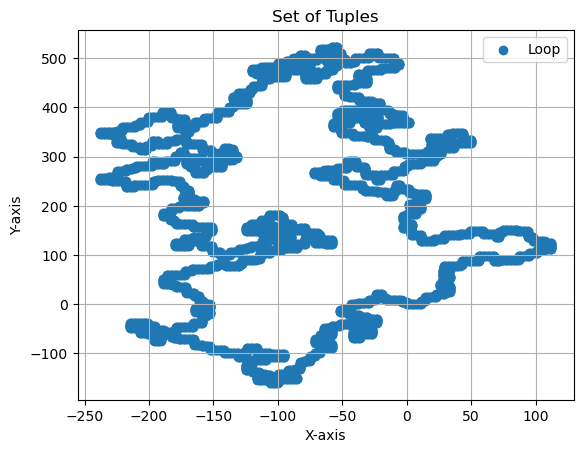

In [4]:
import matplotlib.pyplot as plt

# Visualisation to find middle space to start fill on 
def plot_set(set1):
    
    x_values, y_values = zip(*set1)

   
    plt.scatter(x_values, y_values, marker='o', label='Loop')
    
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Set of Tuples')

    
    plt.legend()

   
    plt.grid(True)
    plt.show()



plot_set(t)

In [5]:
import sys

# Set the recursion limit to a higher value (e.g., 5000)
sys.setrecursionlimit(100000)


In [6]:
#Fill function 
fill_set= {(0,50)}

def ffill(i,j):
    
    if (i, j) in t:
        
        return
    
    
    if((i+1,j) not in t and (i+1,j) not in fill_set):
        fill_set.add((i+1,j))
        ffill(i+1,j)
            
    
    if( (i,j+1) not in t and (i,j+1) not in fill_set):
        fill_set.add((i,j+1))
        ffill(i,j+1)
    
    if( (i-1,j) not in t and (i-1,j) not in fill_set):
        fill_set.add((i-1,j))
        ffill(i-1,j)
   
    if( (i,j-1) not in t and (i,j-1) not in fill_set):
        fill_set.add((i,j-1))
        ffill(i,j-1)
        
    else:
        return 

In [7]:
ffill(-50,200)

In [8]:
len(fill_set)

89876

In [9]:
len(t)+len(fill_set)

95356

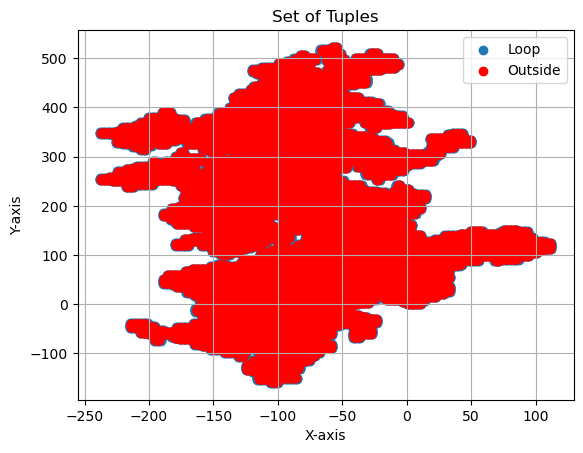

In [10]:
#Visualisation

import matplotlib.pyplot as plt

def plot_set_double(set1, set2):
    
    x_values, y_values = zip(*set1)
    x1_values, y1_values = zip(*set2)
   
    plt.scatter(x_values, y_values, marker='o', label='Loop')
    plt.scatter(x1_values, y1_values, marker='o', c='red', label='Outside')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Set of Tuples')

    
    plt.legend()

   
    plt.grid(True)
    plt.show()



plot_set_double(t, fill_set)


In [11]:
# Separate by line and spaces and turn into integer
import re
s = []

with open('./input.txt', 'r') as file:
    file_content = file.read().strip()  
individual_strings = file_content.split('\n')

for i, individual_str in enumerate(individual_strings, 1):
    word = [num for num in re.split(" ", individual_str)]
    s.append(word)

In [12]:
g = []
f= []
for i in range(len(s)):
    g.append(int(s[i][2][2:-2], 16))
    if s[i][2][-2]=='0':
        f.append('R')
    if s[i][2][-2]=='1':
        f.append('D')
    if s[i][2][-2]=='2':
        f.append('L')
    if s[i][2][-2]=='3':
        f.append('U')

In [13]:
# Test data
#g=[2,3,2,3,2,5,7,3,1,2]
#f=['R','D','R','U','R','D','L','U','R','U']

In [14]:
def dir(way,i,j, amount):
    if way =='U':
        i-=amount 
       
    if way =='D':
        i+=amount
            
    if way =='L':
        j-=amount 
                
    if way =='R':
        j+=amount
            
    return ((i,j))

In [15]:
t = set()
p = []
t.add((1,2))
i = 1
j = 2
for k in range(len(f)):
   
        
    #print(s[k][0])
    i= dir(f[k],i,j, g[k])[0]
    j= dir(f[k],i,j, g[k])[1]
        
    t.add((i,j))
    p.append((i,j))
    


In [16]:
perimeter = 0
n =len(p)
for k in range (n-1):
    d = abs(p[k][0] - p[k+1][0]) + abs(p[k][1] - p[k+1][1])
    perimeter += d
    
d= abs(p[n-1][0]-p[0][0])+ abs(p[n-1][1]-p[0][1])
perimeter += d


In [17]:
perimeter

211472436

In [18]:

sum1 = 0
sum2 = 0
n = len(p)
for i in range (n-1):
    sum1 = sum1+(p[i][0]*p[i+1][1])
    
sum1 = sum1+ (p[n-1][0]*p[0][1])

for j in range (n-1):
    sum2 = sum2 + (p[j][1]*p[j+1][0])
    
sum2 = sum2 + (p[n-1][1]*p[0][0]) 

area = abs((sum1 - sum2)/2)

In [19]:
area

92291363177928.0

In [20]:
#Pick's theorem
# area = (border(perimeter for us)/2 ) + i - 1

inside = area-(perimeter/2)+1
solution = inside + perimeter
print(solution)

92291468914147.0


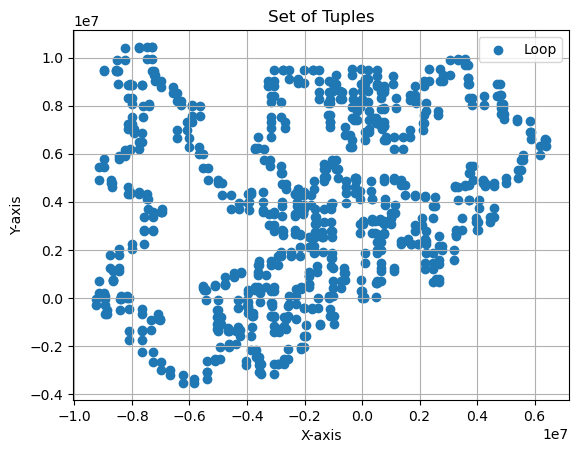

In [21]:
plot_set(t)